<a href="https://colab.research.google.com/github/Agungdecoco/Preprocessing-and-Scoring-Polarity-with-Lexicon/blob/main/Data_Text_Preprocessing_and_Scoring_Polarity_with_Lexicon_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Sastrawi
!pip install nest_asyncio
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import nest_asyncio
nest_asyncio.apply()

from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('/content/Scrape_Instagram_Comment_1.csv')
comments = data[['username','Comments']]
comments

,username,Comments
0,_opick_suaeb,Jajaran keluarga RT yang dapat STB Gratisss
1,shifa.rizki,Apa ini akun kominfo isinya spam smua 😂
2,alan_bw,Hmm. Benahi support system biar seluruh channe...
3,samsir_adrian,"Ada yg sudah digital tapi belum HD, ngga enak ..."
4,zaenaljr,ganti ke digital eh stasiun tv nya blom semua ...
...,...,...
698,sihasaleali,Sy masih ga ngerti dg @kemenkominfo menganjurk...
699,anisaqueen5,Payah bikin masyarakat panik . Pas sebelum tgl...
700,fabio_ichank,Tambah kesini tambah Lawak..Tri . . . mentri
701,tugimin_harjo,"Bersih gambarnya, jernih suaranya, canggih tek..."


In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    # text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
comments['comments_clean'] = comments['Comments'].apply(cleaningText)
comments['comments_clean'] = comments['comments_clean'].apply(remove_emoji)
comments['comments_clean'] = comments['comments_clean'].apply(casefoldingText)
comments.drop(['Comments'], axis = 1, inplace = True)

comments['text_preprocessed'] = comments['comments_clean'].apply(tokenizingText)
comments['text_preprocessed'] = comments['text_preprocessed'].apply(filteringText)
comments['text_preprocessed'] = comments['text_preprocessed'].apply(stemmingText)

In [ ]:
comments.drop_duplicates(subset = 'comments_clean', inplace = True)

In [ ]:
comments

,username,comments_clean,text_preprocessed
0,_opick_suaeb,jajaran keluarga rt yang dapat stb gratisss,"[jajar, keluarga, rt, stb, gratisss]"
1,shifa.rizki,apa ini akun kominfo isinya spam smua,"[akun, kominfo, isi, spam, smua]"
2,alan_bw,hmm benahi support system biar seluruh channel...,"[hmm, benah, support, system, biar, channel, j..."
3,samsir_adrian,ada yg sudah digital tapi belum hd ngga enak d...,"[yg, digital, hd, ngga, enak, tonton, gambar, ..."
4,zaenaljr,ganti ke digital eh stasiun tv nya blom semua ...,"[ganti, digital, eh, stasiun, tv, nya, blom, s..."
...,...,...,...
698,sihasaleali,sy masih ga ngerti dg menganjurkan siaran dig...,"[sy, ga, ngerti, dg, anjur, siar, digital, sta..."
699,anisaqueen5,payah bikin masyarakat panik pas sebelum tgl ...,"[payah, bikin, masyarakat, panik, pas, tgl, ok..."
700,fabio_ichank,tambah kesini tambah lawaktri mentri,"[kesini, lawaktri, tri]"
701,tugimin_harjo,bersih gambarnya jernih suaranya canggih tekno...,"[bersih, gambar, jernih, suara, canggih, tekno..."


In [ ]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('/content/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('/content/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
results = comments['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
comments['polarity_score'] = results[0]
comments['polarity'] = results[1]
print(comments['polarity'].value_counts())

comments

negative    358
neutral     202
positive    143
Name: polarity, dtype: int64


,username,comments_clean,text_preprocessed,polarity_score,polarity
0,_opick_suaeb,jajaran keluarga rt yang dapat stb gratisss,"[jajar, keluarga, rt, stb, gratisss]",1,positive
1,shifa.rizki,apa ini akun kominfo isinya spam smua,"[akun, kominfo, isi, spam, smua]",-6,negative
2,alan_bw,hmm benahi support system biar seluruh channel...,"[hmm, benah, support, system, biar, channel, j...",3,positive
3,samsir_adrian,ada yg sudah digital tapi belum hd ngga enak d...,"[yg, digital, hd, ngga, enak, tonton, gambar, ...",-9,negative
4,zaenaljr,ganti ke digital eh stasiun tv nya blom semua ...,"[ganti, digital, eh, stasiun, tv, nya, blom, s...",2,positive
...,...,...,...,...,...
698,sihasaleali,sy masih ga ngerti dg menganjurkan siaran dig...,"[sy, ga, ngerti, dg, anjur, siar, digital, sta...",-16,negative
699,anisaqueen5,payah bikin masyarakat panik pas sebelum tgl ...,"[payah, bikin, masyarakat, panik, pas, tgl, ok...",-2,negative
700,fabio_ichank,tambah kesini tambah lawaktri mentri,"[kesini, lawaktri, tri]",0,neutral
701,tugimin_harjo,bersih gambarnya jernih suaranya canggih tekno...,"[bersih, gambar, jernih, suara, canggih, tekno...",0,neutral


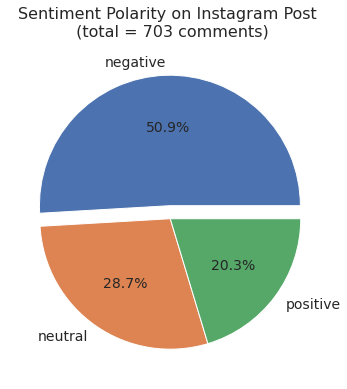

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in comments['polarity'].value_counts()]
labels = list(comments['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Instagram Post \n (total = 703 comments)', fontsize = 16, pad = 20)
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_comments = comments[comments['polarity'] == 'positive']
positive_comments = positive_comments[['comments_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_comments.index += 1
positive_comments[0:10]

,comments_clean,polarity_score,polarity
1,dikit bantuan apa pemerintah gak mikirin yg model prioritas yakl di toko stb bisa dapet harga rban pengadaan pemerintah gak yakin bisa dapet harga dibawah rbmbok ya bisa bikin rakyat ini sejahtera mau beli harga murah kerjaan lancar kalau boleh usul pemerintah sekalian bantu kami gratis listrik biar bisa nonton tv sepuasnya terima kasih kalau di perhatikan,19,positive
2,lebih baik pemerintah fokus dalam membuka lapangan kerja sebanyak banyaknya di masing masing daerah dan menjadi perantara semua hasil bumi karya masyarakat memanfaatkan rupiah yg lemah untuk mencetak exportir dari semua kalangan masyarakat,16,positive
3,pembagian set top box tidak sesuai disini karna kl mau ngambil set top box harus bayar rb kl ga punya duit ya ga di kasih tlng dong kl mau ada pembagian secara gratis harus lewat orang pusat yg datengin secara langsung dr rumah ke rumah yg bener membutuhkan,15,positive
4,bapak kominfo yth kenapa saya tidak dapat set top box gratis sedangkan tetangga saya dapet dimana keadilan anda pak padahal saya penganggurantidak berpenghasilanberarti sudah memenuhi syarat untuk dapat bantuan stb gratistapi kenapa saya tidak dapat pak,11,positive
5,pas request program tv tournamen judi online dan higgs domino islands sponsor nya kominfo bumn pertamina saya yakin pak jadi program yang sukses trending pak corp,8,positive
6,i am overwhelmed with joy right now i can now pay my bills and take good care of my family thank you for bringing happiness to my home and with just an investment of i got in days i am thankful theoronfx,8,positive
7,oke mantap,7,positive
8,halo emak gue yg d batam masih pakai tv tabung gimana nih solusinya wkwk gini amat hidup di negri konoha,5,positive
9,pastikan dulu dilapangan semua masyarakat yang membutuhkan menerima bantuan stb tersebut pastikan juga tidak ada satupun yang terselip dalam pembagiannya sehingga mereka belum menerima kalo dimatikan siaran analog apa yang terjadi bagi yang mereka yang belum mendapat bantuan,5,positive
10,gw jualan follower nih minat,5,positive


In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_comments = comments[comments['polarity'] == 'negative']
positive_comments = positive_comments[['comments_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_comments.index += 1
positive_comments[0:10]

,comments_clean,polarity_score,polarity
1,sinyalnya masih kurang kuat,-1,negative
2,kementrian tilolong mending bubarlah,-1,negative
3,tv analog di matikan nya tgl oktober jabodetabek jam berapa ya,-1,negative
4,ges ges game wildrift anda yang blokir bukan,-1,negative
5,tv di poskamling dan di warteg auto ga ada gambar,-1,negative
6,kepada kominfo kalau bisa jangan dimatikan,-1,negative
7,stb belistb beli,-1,negative
8,bjorka siap bantu,-1,negative
9,hadehhh tv ku sdh digital tp ga semua siaran masuk beli set box dimana,-1,negative
10,chanel tv tetep masih suka ilang sendiri udah digital juga suka leg gk ad sinyal,-1,negative


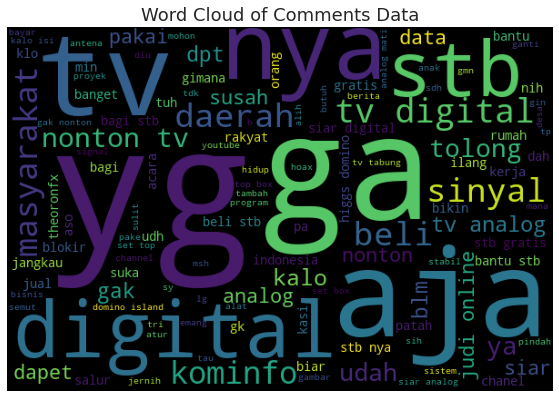

In [ ]:
# Visualize word cloud
list_words=''
for comment in comments['text_preprocessed']:
    for word in comment:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Comments Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [ ]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

In [ ]:
# Visualize positive and negative word cloud

sentiment_words = comments['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on comments Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on comments Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

NameError: ignored

In [ ]:
comments.to_csv(r'comments_ig_dataset_preprocessed.csv', index = False, header = True,index_label=None)